In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import cifar10
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()


170500096/170498071 [==============================] - 10s 0us/step


[6]


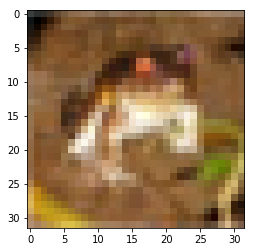

[9]


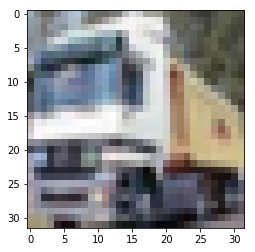

[9]


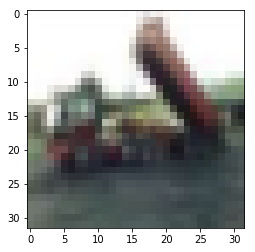

[4]


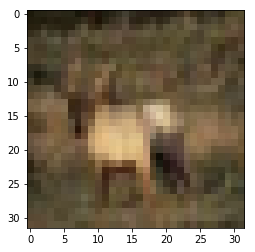

[1]


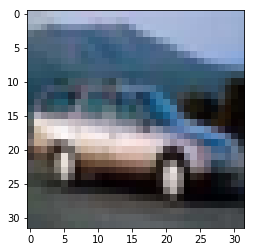

In [3]:
for i in range(5):
  plt.imshow(xtrain[i])
  print(ytrain[i])
  plt.show()

In [0]:
xtrain=xtrain.reshape(50000,3072)
xtest=xtest.reshape(10000,3072)
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")
xtrain=xtrain/255      # preprocessing
xtest=xtest/255
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)

In [5]:
input_img = Input(shape=(3072,))
encoded = Dense(215, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(215, activation='relu')(decoded)
decoded = Dense(3072, activation='sigmoid')(decoded)


W0704 15:33:52.061431 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 15:33:52.094486 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 15:33:52.101132 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(xtrain, xtrain,epochs=100,batch_size=256,shuffle=True,validation_data=(xtest, xtest))

W0704 15:33:52.201457 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 15:33:52.309870 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0704 15:33:52.315593 140420581914496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 215)               660695    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               27648     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
__________

W0704 15:33:52.621478 140420581914496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.6931 - acc: 0.0063 - val_loss: 0.6930 - val_acc: 0.0064
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.6928 - acc: 0.0066 - val_loss: 0.6925 - val_acc: 0.0069
Epoch 3/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.6905 - acc: 0.0076 - val_loss: 0.6852 - val_acc: 0.0086
Epoch 4/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.6797 - acc: 0.0089 - val_loss: 0.6771 - val_acc: 0.0092
Epoch 5/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.6771 - acc: 0.0092 - val_loss: 0.6769 - val_acc: 0.0094
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.6766 - acc: 0.0094 - val_loss: 0.6768 - val_acc: 0.0096
Epoch 7/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.6761 - acc: 0.0096 - val_loss: 0.6753 -

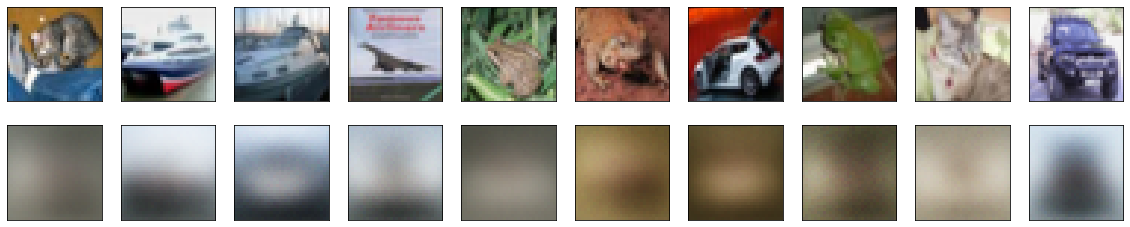

In [8]:
decoded_imgs=autoencoder.predict(xtest)
# printing
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# The Dense layer does not work well for the colored image.
